In [2]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, roc_curve, auc
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import ModelEvaluation as me

In [6]:
DF = pd.read_pickle('../data/numericalFts_100kUsers_ChallengerV1.pkl')

print 'Total Size of Dataset: %d' % DF.shape[0]
print 'Total Unique Users: %d\n\n' % len(DF.ILINK.unique().tolist())

X_features = ['REF_DATE_MONTH',
             'REF_DATE_YEAR',
             'NUM_PAST_ORDERS',
             'SUM_PAST_SHIPPED_SOLD_AMT',
             'AVG_PAST_SHIPPED_SOLD_AMT',
             'STDDEV_PAST_SHIPPED_SOLD_AMT',
             'VAR_PAST_SHIPPED_SOLD_AMT',
             'SUM_PAST_DISCOUNT',
             'AVG_PAST_DISCOUNT',
             'STDDEV_PAST_DISCOUNT',
             'VAR_PAST_DISCOUNT']
dependent = 'BOUGHT_PANTS'

print 'Input features: \n%s\n' % X_features
print 'Dependent feature: %s\n\n' % dependent
X = DF[X_features]
y = DF[dependent]

Total Size of Dataset: 670860
Total Unique Users: 100000


Input features: 
['REF_DATE_MONTH', 'REF_DATE_YEAR', 'NUM_PAST_ORDERS', 'SUM_PAST_SHIPPED_SOLD_AMT', 'AVG_PAST_SHIPPED_SOLD_AMT', 'STDDEV_PAST_SHIPPED_SOLD_AMT', 'VAR_PAST_SHIPPED_SOLD_AMT', 'SUM_PAST_DISCOUNT', 'AVG_PAST_DISCOUNT', 'STDDEV_PAST_DISCOUNT', 'VAR_PAST_DISCOUNT']

Dependent feature: BOUGHT_PANTS




In [7]:
#random_state = 42 to insure same random split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [8]:
grid = pd.read_pickle('../models/RFC_PantsVsAll_ChallengerV1_Numeric.pkl')

Validation Score Accuracy: 93.15% +/- 3.05%
Train Score Accuracy: 99.99% +/- 0.01%


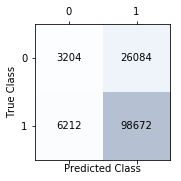

Accuracy: 0.76
Missclassification Rate: 0.24
(1) Positive Rate(Recall): 0.94
(0) Positive Rate(Sensitivity): 0.11
Precision(proportion of predicted (1)): 0.79
Specificity(proportion of predicted (0): 0.34


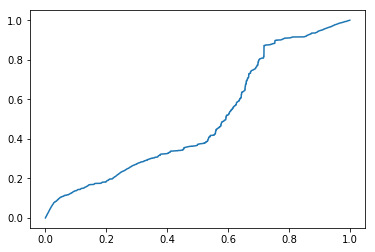

AUC(Area Under Curve) score: 0.499034


In [9]:
me.ModelEvalClassifier(grid,X_test,y_test)